# Problem 1 Submission

In [26]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import tensorflow as tf

from keras.backend.tensorflow_backend import set_session
import keras
from keras import optimizers
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Input, Reshape, Flatten, Lambda, Conv2DTranspose,UpSampling2D
from keras.preprocessing import backend as K
from keras.datasets import mnist

In [27]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
output_X_train = X_train.reshape(-1,28,28,1)

X_test = X_test.astype('float32') / 255.
output_X_test = X_test.reshape(-1,28,28,1)

print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [28]:
input_x_train = output_X_train + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=output_X_train.shape) 
input_x_test = output_X_test + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=output_X_test.shape)

In [29]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)

adam = optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
autoencoder.compile(optimizer=adam, loss='binary_crossentropy',metrics=['accuracy'])

hist = autoencoder.fit(input_x_train,
                       output_X_train, 
                       epochs=20, 
                       batch_size=128, 
                       shuffle=True,
                       validation_split=0.20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 130s 3ms/step - loss: 0.3019 - accuracy: 0.7994 - val_loss: 0.1706 - val_accuracy: 0.8011
Epoch 2/20
48000/48000 [==============================] - 135s 3ms/step - loss: 0.1491 - accuracy: 0.8050 - val_loss: 0.1372 - val_accuracy: 0.8086
Epoch 3/20
48000/48000 [==============================] - 140s 3ms/step - loss: 0.1302 - accuracy: 0.8084 - val_loss: 0.1266 - val_accuracy: 0.8095
Epoch 4/20
48000/48000 [==============================] - 138s 3ms/step - loss: 0.1229 - accuracy: 0.8095 - val_loss: 0.1213 - val_accuracy: 0.8105
Epoch 5/20
48000/48000 [==============================] - 139s 3ms/step - loss: 0.1186 - accuracy: 0.8102 - val_loss: 0.1177 - val_accuracy: 0.8113
Epoch 6/20
48000/48000 [==============================] - 142s 3ms/step - loss: 0.1154 - accuracy: 0.8107 - val_loss: 0.1149 - val_accuracy: 0.8118
Epoch 7/20
48000/48000 [==============================] - 135s

In [30]:
decoded_imgs = autoencoder.predict(input_x_test,verbose=0)

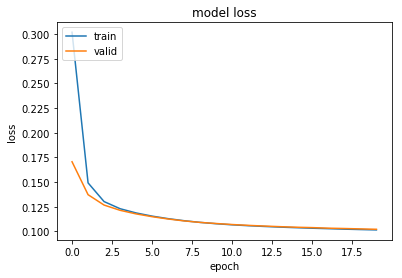

In [31]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

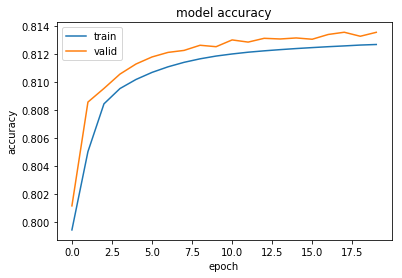

In [32]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

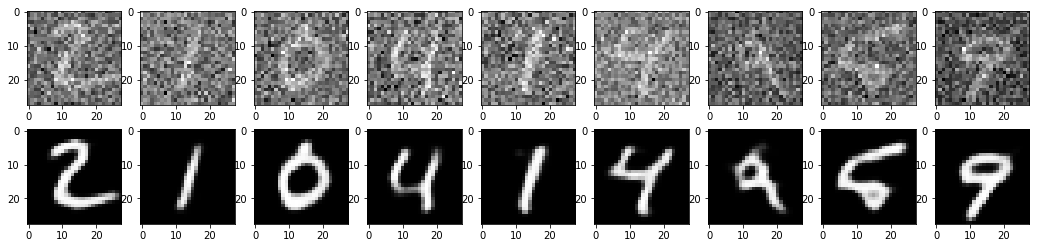

In [33]:
n = 10
plt.figure(figsize=(20, 4))

for i in range(1,n):
    # original noisy image
    ax = plt.subplot(2, n, i)
    plt.imshow(input_x_test[i].reshape(28, 28))
    plt.gray()

    # denosined image
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    
plt.show()

### end